<a href="https://colab.research.google.com/github/JulianSantos-LATAMAI/ECON-5200/blob/main/Assignment%201/Econ_3916_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Create Student Basket with four variables

student_basket = [
    {'Item': 'Tuition', 'Price_2016': 45000, 'Price_2024': 58000},
    {'Item': 'Rent (1 Bed)', 'Price_2016': 1200, 'Price_2024': 1800},
    {'Item': 'Wallaston Sandwhich', 'Price_2016': 7.50, 'Price_2024': 11.50},
    {'Item': 'Coffee', 'Price_2016': 3.50, 'Price_2024': 5.50,}
]

In [ ]:
# Have it calculate inflation
def calculate_inflation(base, current):
    return ((current - base) / base) * 100

Value_Current = 100
Value_at_Start_Date = 50


In [36]:

# Run the Loop
for item in student_basket:
    rate = calculate_inflation(item['Price_2016'], item['Price_2024'])
    print(f"{item['Item']}: {rate:.2f}% Inflation")

Tuition: 28.89% Inflation
Rent (1 Bed): 50.00% Inflation
Wallaston Sandwhich: 53.33% Inflation
Coffee: 57.14% Inflation


In [22]:
#Pull data from FRED Website
!pip install fredapi
import pandas as pd
from fredapi import Fred

fred = Fred(api_key='fad474eb3df437d286629bfe69feb2e0')

official_cpi = fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB')
rent = fred.get_series('CUSR0000SEHA')
WollastonSandwhich =  fred.get_series('CUSR0000SEFV')
Coffee = fred.get_series('CUSR0000SAF116')

df = pd.DataFrame({
    'Official_CPI': official_cpi,
    'Tuition': tuition,
    'Rent': rent,
    'WollastonSandwhich': WollastonSandwhich,
    'Coffee': Coffee
})

#Normalization logic

start_date = '2016-01-01'


for column in df.columns:
  Value_Index = (Value_Current / Value_at_Start_Date) * 100

  df = df[df.index >= start_date]


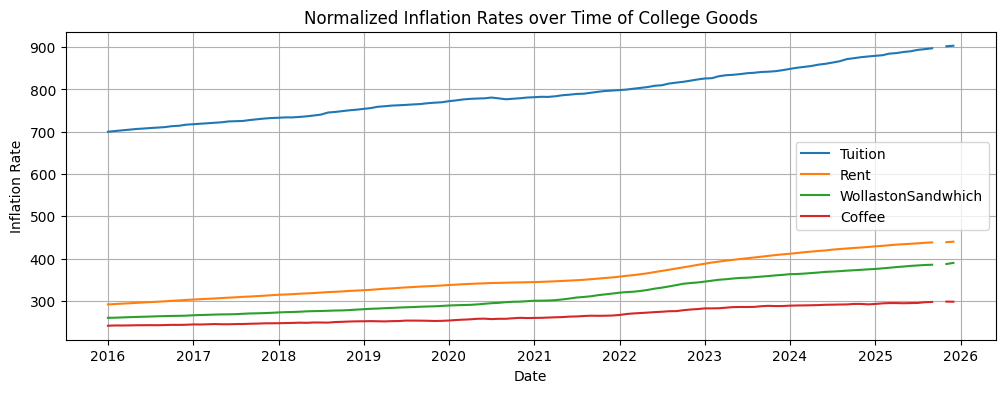

In [23]:
#Plot normalized data
import matplotlib.pyplot as plt

df_filtered = df[df.index >= '2016-01-01']


plt.figure (figsize=(12, 4))
plt.plot(df.index, df['Tuition'], label='Tuition')
plt.plot(df.index, df['Rent'], label='Rent')
plt.plot(df.index, df['WollastonSandwhich'], label='WollastonSandwhich')
plt.plot(df.index, df['Coffee'], label='Coffee')
plt.title ('Normalized Inflation Rates over Time of College Goods')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
#Weigh Data and obtain student_cpi
weights = {
    'Tuition': 0.60,
    'Rent': 0.30,
    'WollastonSandwhich': 0.07,
    'Coffee': 0.03
}

df['Student_SPI'] = (
    df['Tuition'] * weights['Tuition'] +
    df['Rent'] * weights['Rent'] +
    df['WollastonSandwhich'] * weights['WollastonSandwhich'] +
    df['Coffee'] * weights['Coffee']
)


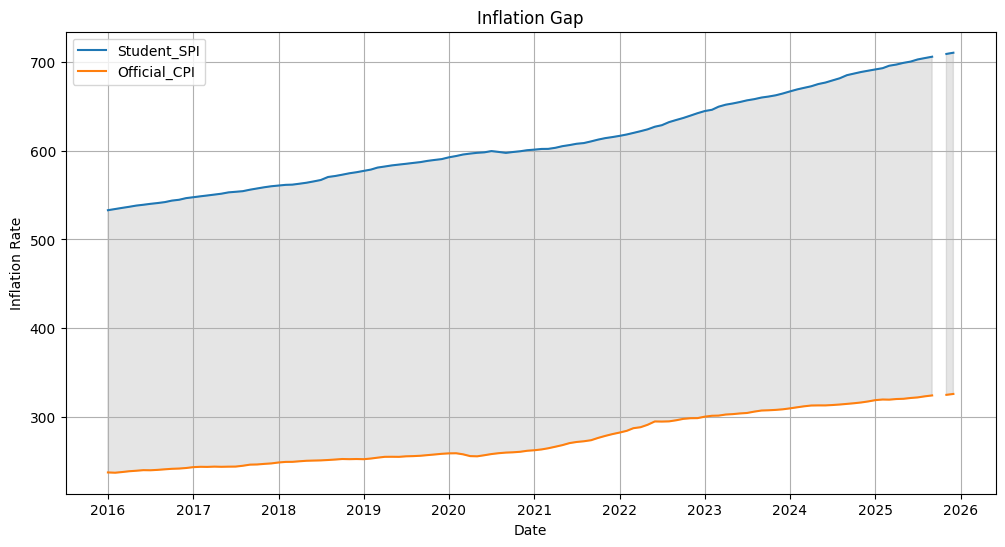

In [30]:
#Visualize Inflaiton Gap
import matplotlib.pyplot as plt

df_filtered = df[df.index >= '2016-01-01']

plt.figure (figsize=(12,6))
plt.plot(df.index, df['Student_SPI'], label='Student_SPI')
plt.plot(df.index, df['Official_CPI'], label='Official_CPI')
plt.fill_between(df.index, df['Official_CPI'], df['Student_SPI'], color='gray', alpha=0.2)
plt.title ('Inflation Gap')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.legend()
plt.grid(True)


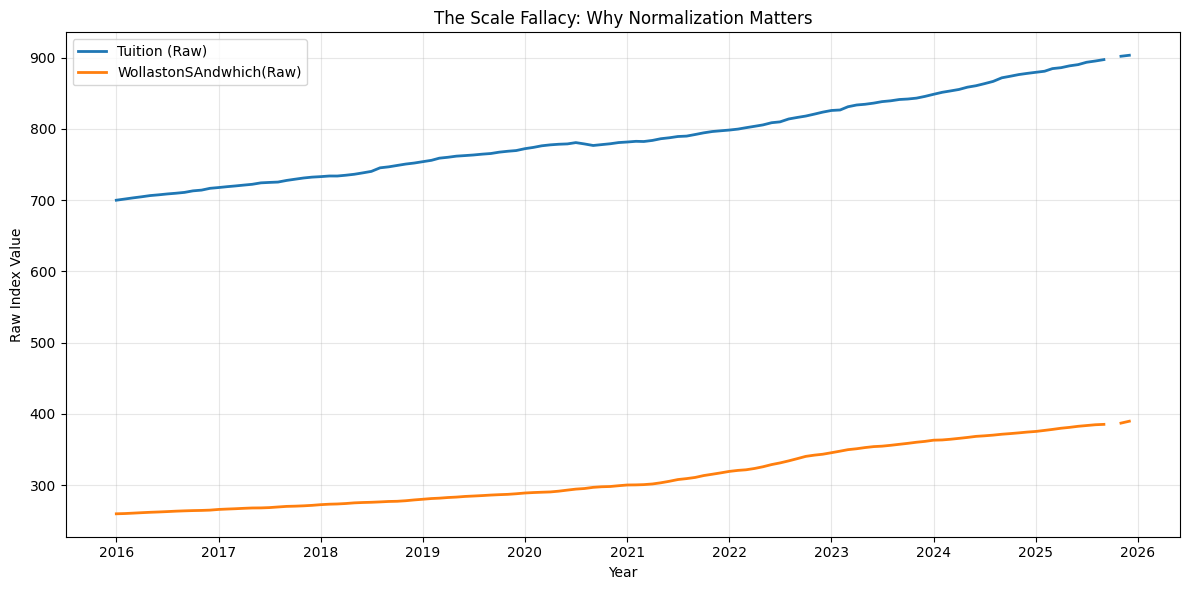

In [32]:
#Visualize Scale Fallacy with RAW Data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Tuition'], label='Tuition (Raw)', linewidth=2)
plt.plot(df.index, df['WollastonSandwhich'], label='WollastonSAndwhich(Raw)', linewidth=2)

plt.title('The Scale Fallacy: Why Normalization Matters')
plt.xlabel('Year')
plt.ylabel('Raw Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
Because we are measuring rate of change, using the same reference point allows us to compare the data fairly.
If one index starts at 900 and another at 100, it looks like one is way bigger,
but that's just because they have different base years.
By normalizing everything to 2016=100,
 we can actually see which categories have grown faster.
 Without normalization, we're just looking at raw numbers from different starting points,
 which doesn't tell us anything useful about inflation rates.

/tmp/ipython-input-3624032745.py:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Boston_CPI'] = df['Boston_CPI'].fillna(method='ffill')


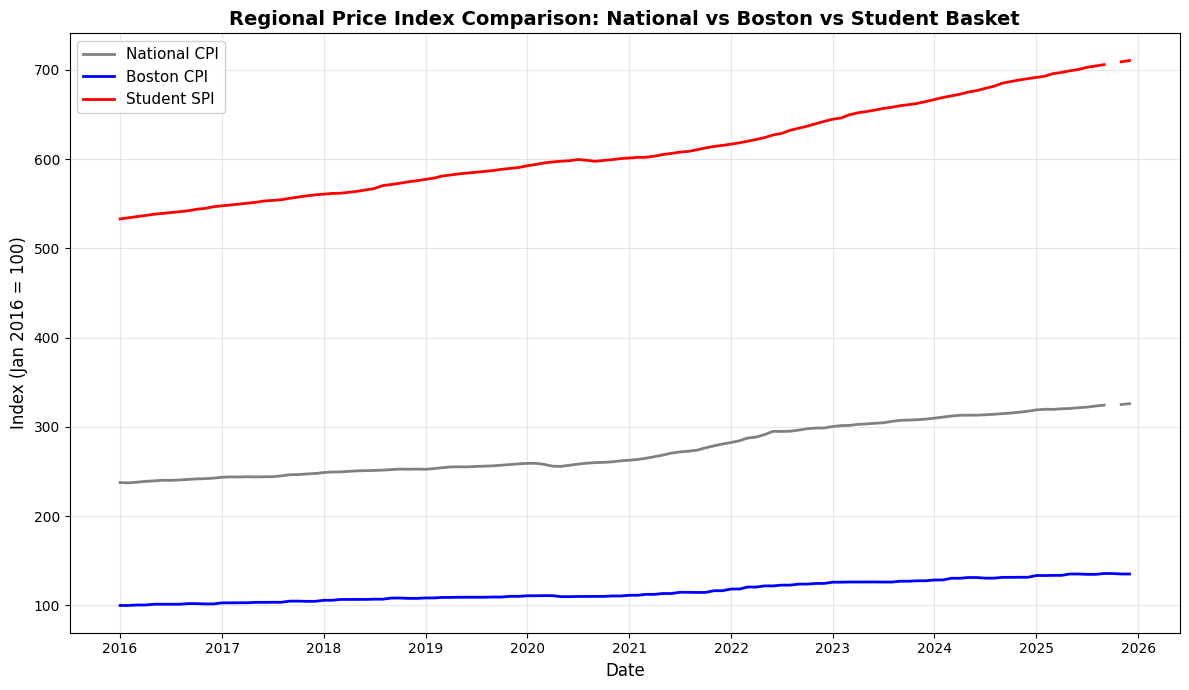


=== MACROECONOMIC ANALYSIS: Regional Disparities ===

Cumulative inflation from Jan 2016 to latest date:
  National CPI:  226.03%
  Boston CPI:    35.25%
  Student SPI:   610.29%

Boston premium over National CPI: -190.78 points
Student burden over Boston CPI:   575.03 points


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Initialize FRED API (you'll need to set your API key)
# Get a free API key at: https://fred.stlouisfed.org/docs/api/api_key.html
fred = Fred(api_key='fad474eb3df437d286629bfe69feb2e0')

# The FRED series code for Boston-Cambridge-Newton CPI is:
# CUURA103SA0 - Consumer Price Index for All Urban Consumers: All Items in Boston-Cambridge-Newton, MA-NH
boston_cpi_code = 'CUURA103SA0'

# Fetch Boston CPI data
boston_cpi_raw = fred.get_series(boston_cpi_code)

# Convert to DataFrame for easier manipulation
boston_df = pd.DataFrame({
    'Boston_CPI_Raw': boston_cpi_raw
})

# Re-index Boston CPI so January 1, 2016 = 100
baseline_date = '2016-01-01'
baseline_value = boston_df.loc[baseline_date, 'Boston_CPI_Raw']
boston_df['Boston_CPI'] = (boston_df['Boston_CPI_Raw'] / baseline_value) * 100

# Merge with your existing DataFrame
# Assuming df has a datetime index
df = df.join(boston_df['Boston_CPI'], how='left')

# Handle missing values (forward fill for any gaps in monthly data)
df['Boston_CPI'] = df['Boston_CPI'].fillna(method='ffill')

# Create the plot
plt.figure(figsize=(12, 7))

plt.plot(df.index, df['Official_CPI'], color='grey', linewidth=2, label='National CPI')
plt.plot(df.index, df['Boston_CPI'], color='blue', linewidth=2, label='Boston CPI')
plt.plot(df.index, df['Student_SPI'], color='red', linewidth=2, label='Student SPI')

plt.title('Regional Price Index Comparison: National vs Boston vs Student Basket',
          fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Index (Jan 2016 = 100)', fontsize=12)
plt.legend(loc='best', fontsize=11, framealpha=0.9)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

# Optional: Display summary statistics for macroeconomic analysis
print("\n=== MACROECONOMIC ANALYSIS: Regional Disparities ===")
print(f"\nCumulative inflation from Jan 2016 to latest date:")
print(f"  National CPI:  {df['Official_CPI'].iloc[-1] - 100:.2f}%")
print(f"  Boston CPI:    {df['Boston_CPI'].iloc[-1] - 100:.2f}%")
print(f"  Student SPI:   {df['Student_SPI'].iloc[-1] - 100:.2f}%")

print(f"\nBoston premium over National CPI: {df['Boston_CPI'].iloc[-1] - df['Official_CPI'].iloc[-1]:.2f} points")
print(f"Student burden over Boston CPI:   {df['Student_SPI'].iloc[-1] - df['Boston_CPI'].iloc[-1]:.2f} points")